<a href="https://colab.research.google.com/github/ronenbendavid/IDC_NLP/blob/master/AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# AutoKeras
This assignment is about training and evaluating a POS tagger with some real data. The dataset is available through NLTK, a Python NLP package.

In [1]:
## Library import
# !pip uninstall keras-tuner
# !pip3 uninstall autokeras
# !pip install --upgrade pip
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1#egg=keras-tuner-1.0.2rc1



# !pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1#egg=keras-tuner-1.0.2rc1`.




  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-install-vwyzea71/keras-tuner-1.0.2rc1
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-install-vwyzea71/keras-tuner-1.0.2rc1
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-cp36-none-any.whl size=85424 sha256=5dc4f95f8a9e3829cf9100c9c7c3af82588517265b080bb4cf4fcc8e0f00e080
  Stored in directory: /tmp/pip-ephem-wheel-cache-z791cj3d/wheels/af/c9/7c/6ea01f9753a5dd1484136b4cb7b33a0a7fba253e5c74ade5af
  ERROR: Failed building wheel for keras-tuner
  Running setup.py clean for keras-tuner
  ERROR: Failed cleaning build dir for keras-tuner
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=ba9a535bd8f66e5c0acea0996ccc2aec63d27d82c9fcb3aa83ee887120861fb3
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac

In [2]:
!pip3 install autokeras

     |████████████████████████████████| 122kB 2.7MB/s 


In [3]:
import autokeras as ak

In [5]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

# Prepare example Data - Shape 1D
num_instances = 100
num_features = 5
x_train = np.random.rand(num_instances, num_features).astype(np.float32)
y_train = np.zeros(num_instances).astype(np.float32)
y_train[0:int(num_instances/2)]=1
x_test = np.random.rand(num_instances, num_features).astype(np.float32)
y_test = np.zeros(num_instances).astype(np.float32)
y_train[0:int(num_instances/2)]=1
x_train = np.expand_dims(x_train, axis=2) #This step it's very important an CNN will only accept this data shape
print(x_train.shape)
print(y_train.shape)

(100, 5, 1)
(100,)


Trial 1 Complete [00h 00m 09s]
val_loss: 0.696342945098877

Best val_loss So Far: 0.696342945098877
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit
4/4 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.0000e+00
[0.6974348425865173, 0.0]
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 5, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (Non

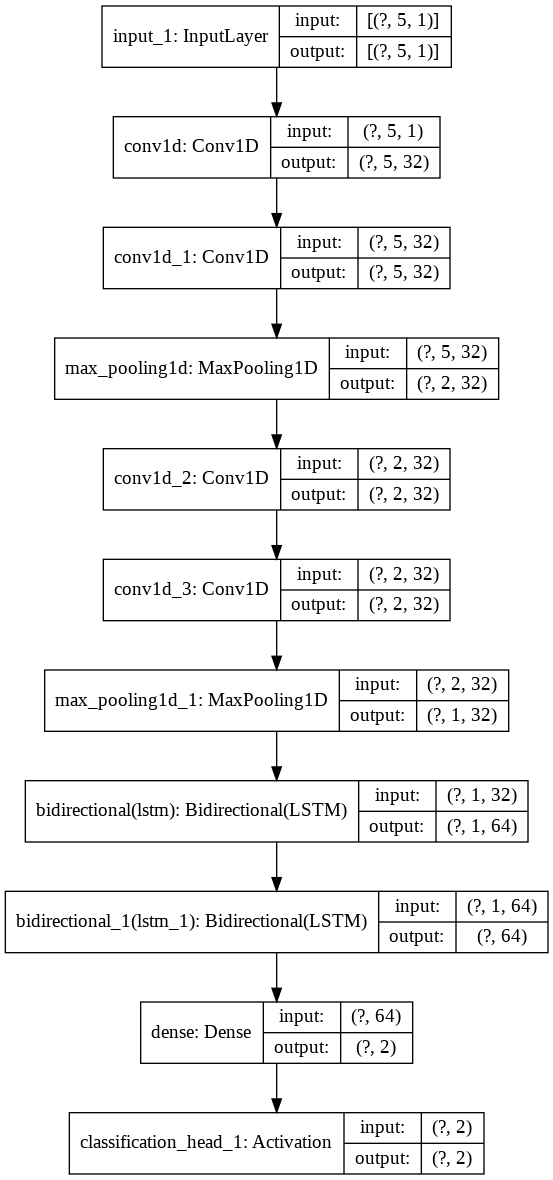

In [11]:



# Prepare Automodel for search
input_node = ak.Input() 
output_node1 = ak.ConvBlock()(input_node) 
output_node2 = ak.RNNBlock()(output_node1) 
#output_node = ak.DenseBlock()(output_node) #optional
#output_node = ak.SpatialReduction()(output_node) #optional
output_node = ak.ClassificationHead(num_classes=2, multi_label=True)(output_node2)

auto_model = ak.AutoModel(inputs=input_node,outputs=output_node,overwrite=True,max_trials=1)


# Search
auto_model.fit(x_train, y_train, epochs=1)
print(auto_model.evaluate(x_test, y_test))


# Export as a Keras Model
model = auto_model.export_model()
print(type(model.summary()))

#print model as image
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, to_file='name.png')

**Part 1** (no actions required)

The dataset is composed of a set of sentences. Each sentence is a list of tuples of a word and a tag, as provided by human annotators.
You should split the data to train and test sets in the following way:


In [ ]:
%reset -f

In [ ]:
from collections import Counter, defaultdict
from random import randint

In [ ]:
class hmm_tagger:
  def __init__(self):
        self.tags = None
        self.words = None
        self.A = None
        self.B = None
        self.Pi = None

  def train(self, data):
    # TODO
    # tmp - calculate words/tags dictionaries
    words_set = set()
    tags_set = set()
    # tmp - calculate self.A
    tags_next_counter = defaultdict(lambda: Counter())
    # tmp - calculate self.B
    tag_words_counter = defaultdict(lambda: Counter())
    # tmp - calculate self.Pi
    first_tags_counter = Counter()
    for sen in data:
      prev_tag = None
      first_tags_counter[sen[0][1]] += 1
      # dictionaries
      for word, tag in sen:
        words_set.add(word)
        tags_set.add(tag)

        tag_words_counter[tag][word] += 1
        if prev_tag is not None:
          tags_next_counter[prev_tag][tag] += 1
        prev_tag = tag
    # Calculate words/tags dictionaries
    print(tags_set)
    print(words_set)
    print(tags_next_counter)
    print(tag_words_counter)
    #index tags and words
    self.tags = {k: i for i, k in enumerate(tags_set)}
    self.words = {k: i for i, k in enumerate(words_set)}
    print(self.words)
    print(self.tags)
     # Calculate A
    self.A = np.zeros((len(self.tags), len(self.tags)))
    for tag, next_tags in tags_next_counter.items():
      tag_total = sum(next_tags.values())
      tagslist = []
      for next_tag in next_tags:
        p = next_tags[next_tag] / tag_total
        tagslist.append(p)
        self.A[self.tags[tag]][self.tags[next_tag]] = p
      # print(self.A)
    self.B = np.zeros((len(self.tags), len(self.words)))
    for tag, words in tag_words_counter.items():
      tag_total = sum(words.values())
      tagslist = []
      for word in words:
        p = words[word] / tag_total
        tagslist.append(p)
        self.B[self.tags[tag]][self.words[word]] = p
      # print(round(sum(tagslist),3))
    # print(self.B)
    # Calculate Pi
    self.Pi = np.zeros(len(self.tags))
    total_tags = sum(first_tags_counter.values())
    for tag, count in first_tags_counter.items():
        self.Pi[self.tags[tag]] = count / total_tags
  
  def evaluate(self, data):
    # TODO
    total_words = 0
    success_words = 0
    sentences_stats = 0
    once = 0
    for sentence in data:
        total_words += len(sentence)
        match_count = 0
        words_list = []
        tags_list = []
       
        for word, tag in sentence:
                if word not in self.words:
                    # if words_list:
                    #     results_list = viterbi(words_list, self.A, self.B, self.Pi)
                    #     results_list = np.append(results_list, randint(0, len(self.tags) - 1))
                    # else:
                    #     results_list = [randint(0, len(self.tags) - 1)]
                    tags_list.append(self.tags[tag])
                    words_list.append(randint(0, len(self.tags) - 1))
                    #use parallel iteration command
                    # match_count += sum(t1 == t2 for t1, t2 in zip(tags_list, results_list))
                    # words_list = []
                    # tags_list = []
                else:
                    words_list.append(self.words[word])
                    tags_list.append(self.tags[tag])

        if words_list:
            results_list = viterbi(words_list, self.A, self.B, self.Pi)
            match_count += sum(t1 == t2 for t1, t2 in zip(tags_list, results_list))
            # print(sentence)
            # print(tags_list)
            # print(results_list)
                
        success_words += match_count
        sentences_stats += (match_count == len(sentence))
    sentences_stats = sentences_stats / len(data)
    words_stats = success_words / total_words
    return words_stats, sentences_stats

In [ ]:
# Viterbi
def viterbi (word_list, A, B, Pi):

    # initialization
    T = len(word_list)
    N = A.shape[0] # number of tags

    delta_table = np.zeros((N, T)) # initialise delta table
    psi = np.zeros((N, T))  # initialise the best path table

    delta_table[:,0] = B[:, word_list[0]] * Pi

    for t in range(1, T):
        for s in range (0, N):
            trans_p = delta_table[:, t-1] * A[:, s]
            psi[s, t], delta_table[s, t] = max(enumerate(trans_p), key=operator.itemgetter(1))
            delta_table[s, t] = delta_table[s, t] * B[s, word_list[t]]

    # Back tracking
    seq = np.zeros(T);
    seq[T-1] =  delta_table[:, T-1].argmax()
    for t in range(T-1, 0, -1):
      # print(seq[t])
      seq[t-1] = psi[int(seq[t]),t]

    return seq

# A simple example to run the algorithm:

# A = np.array([[0.3, 0.7], [0.2, 0.8]])
# B = np.array([[0.1, 0.1, 0.3, 0.5], [0.3, 0.3, 0.2, 0.2]])
# Pi = np.array([0.4, 0.6])
# print(viterbi([3, 3, 3, 3], A, B, Pi))

In [ ]:
hmm = hmm_tagger()
hmm.train(train_data)

{'RB', 'EX', 'RBS', ',', 'VBN', 'MD', '#', 'NN', 'VB', 'VBZ', 'CC', 'PDT', 'VBP', 'RP', 'DT', '``', 'NNPS', '-LRB-', '.', ':', 'VBD', 'WRB', 'SYM', 'LS', 'CD', 'JJ', '-NONE-', 'RBR', '-RRB-', 'FW', 'VBG', "''", 'POS', 'WDT', 'WP$', 'PRP$', 'IN', 'UH', 'JJS', 'NNS', 'WP', 'JJR', 'PRP', '$', 'TO', 'NNP'}
{'hook', 'wrecking', 'restructured', 'foreign', 'prestigious', 'recommended', 'discussions', 'downside', 'than', 'suspend', 'spending', 'wallowing', 'yields', 'Killeen', 'adjusted', 'Consent', 'keyboards', 'Arabia', 'romanticized', 'torrent', 'exit', '1,500', 'fits', 'Earlier', 'decorated', 'third-quarter', 'movie', 'Cleveland', 'tally', 'self-serving', 'accrued', '*T*-186', 'transferring', 'war-rationed', 'difficult', 'marbles', 'volatility', 'Tiphook', 'wires', 'Arbitraging', 'Nissho-Iwai', 'software', '*T*-71', 'spread', '@', 'survivor', 'RULING', 'intense', 'dominance', 'M.', 'mind', 'Cartons', 'sources', 'economy', 'fault', 'J.P.', 'Saudi', 'Michigan', 'Crew', 'fend', 'seize', '*T*-

In [ ]:
hmm_wla, hmm_sla = hmm.evaluate(test_data)
print ("HMM Tagger: Word level accuarcy is : {:f}; Sentence level accuarcy is {:f}".format(hmm_wla,hmm_sla))


HMM Tagger: Word level accuarcy is : 0.783466; Sentence level accuarcy is 0.109409


**Part 4**

Compare the results obtained from both taggers and a MEMM tagger, implemented by NLTK, over the test data. To train the NLTK MEMM tagger you should execute the following lines (it may take some time to train...):

In [ ]:
from nltk.tag import tnt 

tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_data)
# print(tnt_pos_tagger.evaluate(test_data))

TODO: Print both, word level and sentence level accuracy for all the three taggers in a table.

In [ ]:
def evaluate_memm(data, tagger):
   # TODO
    total_words = 0
    success_words = 0
    sentences_stats = 0
    once = 0
    for sentence in data:
        total_words += len(sentence)
        match_count = 0
        tags_list = []
        data_only_words = (map(lambda word_tag: word_tag[0], sentence))
        prediction = tagger.tag(data_only_words)
        results_list = []
        for wordtnt,tagtnt in prediction:
            results_list.append(tagtnt)
        for word, tag in sentence:
          tags_list.append(tag)
        # print(tags_list)
        # print(results_list)
        match_count += sum(t1 == t2 for t1, t2 in zip(tags_list, results_list))
            # print(sentence)
            # print(tags_list)
            # print(results_list)
                
        success_words += match_count
        sentences_stats += (match_count == len(sentence))
    sentences_stats = sentences_stats / len(data)
    words_stats = success_words / total_words
    return words_stats, sentences_stats


In [ ]:
memm_wla, memm_sla = evaluate_memm(test_data, tnt_pos_tagger)
print((memm_wla,memm_sla))

(0.875545003237643, 0.09846827133479212)


In [ ]:
import pandas as pd
table = {'simple': [wla,sla],'hmm': [hmm_wla,hmm_sla],'memm':[memm_wla,memm_sla]}

df = pd.DataFrame(table,index = ['word_acc','sentence_acc']) 

print(df)

                simple       hmm      memm
word_acc      0.874120  0.783466  0.875545
sentence_acc  0.079869  0.109409  0.098468
